# Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [7]:
import numpy as np
from itertools import product
from random import randint
import time
import matplotlib.pyplot as plt


In [8]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])


In [9]:
class KnapSack:
    def __init__(self, profits, weights, capacity):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity
        
  
    def solve_knapsack_brute_force(self):
        best_combination = None
        best_profit = 0
        best_weight = 0
        combinations = product([0, 1], repeat=len(self.weights))
        
        for selected_items in combinations:
            sum_weights = sum(weight for weight, selected in
                             zip(self.weights, selected_items) if selected == 1)
            if sum_weights > self.capacity:
                continue
            sum_profits = sum(profit for profit, selected in
                              zip(self.profits, selected_items) if selected == 1)
            
            if sum_profits > best_profit:
                best_profit = sum_profits
                best_weight = sum_weights
                best_combination = selected_items
        
        return [i for i, selected in enumerate(best_combination) if selected == 1], best_profit, best_weight


    def solve_knapsack_pw_ratio(self):
        pw_ratios = [(i, self.profits[i]/self.weights[i]) for i in range(len(self.weights))]
        pw_ratios.sort(key=lambda x: x[1], reverse=True)
        
        sum_weights = 0
        sum_profits = 0
        selected_items = []
        
        for i, _ in pw_ratios:
            if sum_weights + self.weights[i] <= self.capacity:
                selected_items.append(i)
                sum_weights += self.weights[i]
                sum_profits += self.profits[i]
            else:
                break
                
        return selected_items, sum_profits, sum_weights
                

## Podstawowy test działania napisanych metod

In [10]:
knap_sack = KnapSack(profits, weights, capacity)

print(f"Brute force method solve at capacity = {capacity}")
selected_items, sum_profits, sum_weights = knap_sack.solve_knapsack_brute_force()
print(f"Selected items: {selected_items}; profits sum: {sum_profits}; weights sum: {sum_weights}\n")

print(f"Heuristic pw ratio method solve at capacity = {capacity}")
selected_items, sum_profits, sum_weights = knap_sack.solve_knapsack_pw_ratio()
print(f"Selected items: {selected_items}; profits sum: {sum_profits}; weights sum: {sum_weights}\n")

Brute force method solve at capacity = 9
Selected items: [1, 2]; profits sum: 17; weights sum: 8

Heuristic pw ratio method solve at capacity = 9
Selected items: [3, 1]; profits sum: 14; weights sum: 5



Jak widać, obie metody zwróciły inne wyniki. Nie świadczy to jednak o ich złym działaniu. Metoda brute force sprawdza wszystkie możliwe kombinacje i porównuje zyski dla wszystkich dopuszczalnych kombinacji. Dlatego też zwraca ona zawsze najlepsze możliwe rozwiązanie problemu plecakowego. Metoda heurystyczna niestety nie zawsze zwraca optymalne rozwiązanie, co zależy w dużej mierze od rozważanych wag i zysków z poszczególnych przedmiotów. Jej zaletą jest natomiast większa szybkość działania.
## Analiza wydajności napisanych metod

In [11]:
max_weight = 20
max_profit = 20

max_elements_number1 = 20
max_elements_number2 = 200

iteration_number = 10


In [12]:
# Brute force method test

weights1 = weights.copy()
profits1 = profits.copy()

execution_times1 = []
elements_numbers1 = []

for _ in range(max_elements_number1 - len(weights)):
    weights1 = np.append(weights1, randint(1, max_weight))
    profits1 = np.append(profits1, randint(1, max_profit))
    
    knap_sack = KnapSack(profits1, weights1, capacity)
    elements_numbers1.append(len(weights1))
    
    same_parameters_execution_times = []
    for __ in range(iteration_number):
        start_time = time.process_time()
        knap_sack.solve_knapsack_brute_force()
        end_time = time.process_time()
        same_parameters_execution_times.append(end_time - start_time)
        
    average_execution_time = sum(same_parameters_execution_times)/iteration_number
    execution_times1.append(average_execution_time)
    
    print(f"Brute force method;\t Items number: {len(weights1)};\t average execution time: {average_execution_time}")
    

Brute force method;	 Items number: 5;	 average execution time: 0.0003442274999997608
Brute force method;	 Items number: 6;	 average execution time: 0.0006756058999982884
Brute force method;	 Items number: 7;	 average execution time: 0.0006625284999998371
Brute force method;	 Items number: 8;	 average execution time: 0.0012970636999995121
Brute force method;	 Items number: 9;	 average execution time: 0.003973498299997403
Brute force method;	 Items number: 10;	 average execution time: 0.005849438299999577
Brute force method;	 Items number: 11;	 average execution time: 0.02056981339999737
Brute force method;	 Items number: 12;	 average execution time: 0.03008892239999881
Brute force method;	 Items number: 13;	 average execution time: 0.06018430350000017
Brute force method;	 Items number: 14;	 average execution time: 0.12696355479999966
Brute force method;	 Items number: 15;	 average execution time: 0.10200512409999903
Brute force method;	 Items number: 16;	 average execution time: 0.36798

In [13]:
# Heuristic pw method test

weights2 = weights.copy()
profits2 = profits.copy()

execution_times2 = []
elements_numbers2 = []

for _ in range(max_elements_number2 - len(weights)):
    weights2 = np.append(weights2, randint(1, max_weight))
    profits2 = np.append(profits2, randint(1, max_profit))
    
    knap_sack = KnapSack(profits2, weights2, capacity)
    elements_numbers2.append(len(weights2))
    
    same_parameters_execution_times = []
    for __ in range(iteration_number):
        start_time = time.process_time()
        knap_sack.solve_knapsack_pw_ratio()
        end_time = time.process_time()
        same_parameters_execution_times.append(end_time - start_time)
        
    average_execution_time = sum(same_parameters_execution_times)/iteration_number
    execution_times2.append(average_execution_time)
    
    print(f"Heuristic pw method;\t Items number: {len(weights2)};\t average execution time: {average_execution_time}")
    

Heuristic pw method;	 Items number: 5;	 average execution time: 1.2163200000259167e-05
Heuristic pw method;	 Items number: 6;	 average execution time: 3.471020000063163e-05
Heuristic pw method;	 Items number: 7;	 average execution time: 1.8421700002591023e-05
Heuristic pw method;	 Items number: 8;	 average execution time: 1.7540999994025697e-05
Heuristic pw method;	 Items number: 9;	 average execution time: 1.930059999608602e-05
Heuristic pw method;	 Items number: 10;	 average execution time: 2.0538200004693863e-05
Heuristic pw method;	 Items number: 11;	 average execution time: 2.1383999998647597e-05
Heuristic pw method;	 Items number: 12;	 average execution time: 2.3050000001489936e-05
Heuristic pw method;	 Items number: 13;	 average execution time: 2.4048600002402055e-05
Heuristic pw method;	 Items number: 14;	 average execution time: 2.726199999472101e-05
Heuristic pw method;	 Items number: 15;	 average execution time: 2.53274000044712e-05
Heuristic pw method;	 Items number: 16;	 a

### Wykresy czasu obliczeń w zależności od ilości przedmiotów dla obu metod

Text(0.5, 1.0, 'Czas wykonania zadania metodą Brute force w zależności od liczby przedmiotów')

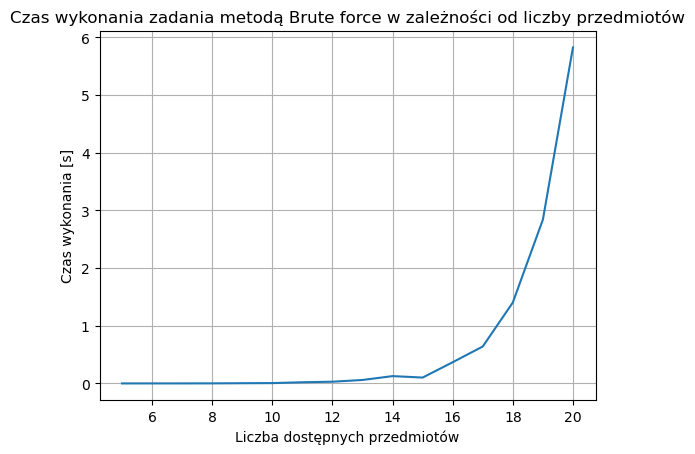

In [14]:
plt.plot(elements_numbers1, execution_times1)
plt.grid()
plt.ylabel("Czas wykonania [s]")
plt.xlabel("Liczba dostępnych przedmiotów")
plt.title("Czas wykonania zadania metodą Brute force w zależności od liczby przedmiotów")


Text(0.5, 1.0, 'Czas wykonania zadania metodą Heurystyczną pw w zależności od liczby przedmiotów')

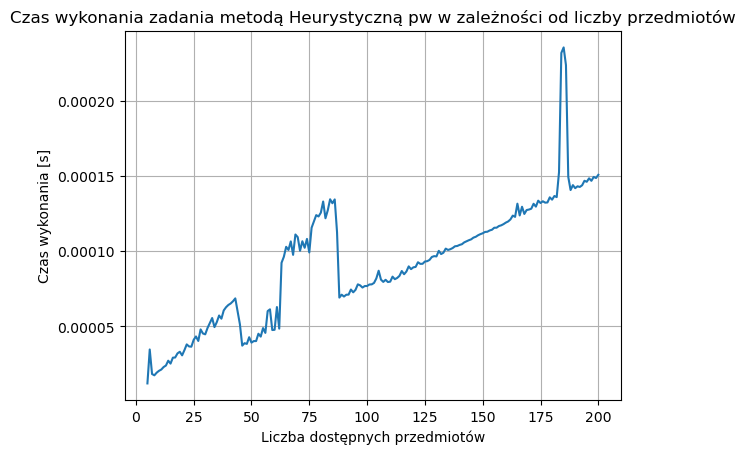

In [15]:
plt.plot(elements_numbers2, execution_times2)
plt.grid()
plt.ylabel("Czas wykonania [s]")
plt.xlabel("Liczba dostępnych przedmiotów")
plt.title("Czas wykonania zadania metodą Heurystyczną pw w zależności od liczby przedmiotów")

Text(0.5, 1.0, 'Porównanie szybkości działania metody Brute force oraz Heurystycznej')

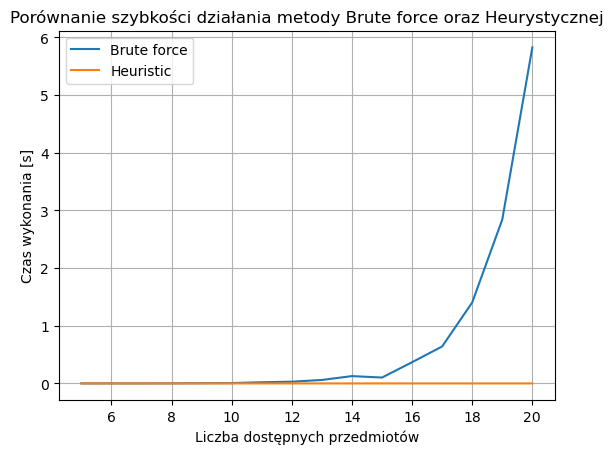

In [16]:
plt.plot(elements_numbers1, execution_times1, label="Brute force")
plt.plot(elements_numbers1, execution_times2[:len(elements_numbers1)], label="Heuristic")
plt.grid()
plt.legend()
plt.ylabel("Czas wykonania [s]")
plt.xlabel("Liczba dostępnych przedmiotów")
plt.title("Porównanie szybkości działania metody Brute force oraz Heurystycznej")

## Podsumowanie i wnioski
Dla małej ilości dostępnych przedmiotów wykonanie metody Brute force zajmuje podobną ilość czasu, co wykonanie metody heurystycznej, dodatkowo zwracając zawsze najlepsze możliwe rozwiązanie, w odróżnieniu od metody heurystycznej. Jednak zależność złożoności obliczeniowej od ilości dostępnych przedmiotów jest wykładnicza, co zwane jest eksplozją kombinatoryczną. Ilość kombinacji wynosi 2^n, gdzie n to liczba przedmiotów.  
Natomiast złożoność metody heurystycznej polegającej na wybieraniu przedmiotów według największego współczynnika wartości do wagi jest w przybliżeniu liniowa. Nie jest potrzebne w niej sprawdzanie wszystkich możliwych kombinacji, a ilość obliczeń sprowadza się jedynie do posegregowania przedmiotów według malejącego współczynnika wartości do wagi oraz do wybierania kolejnych przedmiotów i sprawdzania limitu wagi. Niestety nie gwarantuje ona otrzymania najlepszego wyniku, co pokazał test wykonany powyżej. 
 
W programie testującym czas wykonywanie obliczeń wynik jest średnią z 10 powtórzeń. Konieczność ich przeprowadzenia wynika z tego, że Linuks nie jest systemem czasu rzeczyswistego, a w tle pracują zawsze jeszcze inne procesy, stąd więc czas wykonyania tych samych obliczeń może się różnić za każdym wywołaniem tej samej metody. Między innymi z tego powodu na wykresie dla metody Heurystycznej pw widać losowe piki wartości czasu obliczeń.  

Algorytm Brute force sprawdzi się więc niestety tylko dla niewielkich zbiorów danych, lub gdy dysponuje się dużą mocą obliczeniową. W przeciwnym przypadku zadowalający efekt może przynieść algorytm A*, który jesst połączeniem algorytmu najpierw najlepszy oraz funkcji heurystycznej. 
